# Load URMP-mono from tfrecords




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q git+git://github.com/nielsrolf/ddsp

from ddsp.colab import colab_utils

     |████████████████████████████████| 92kB 7.0MB/s 
     |████████████████████████████████| 215kB 17.2MB/s 
     |████████████████████████████████| 3.7MB 21.0MB/s 
     |████████████████████████████████| 368kB 59.3MB/s 
     |████████████████████████████████| 5.6MB 14.0MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 


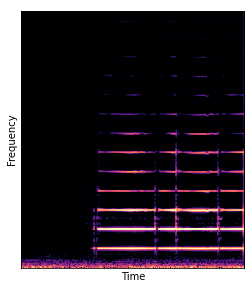

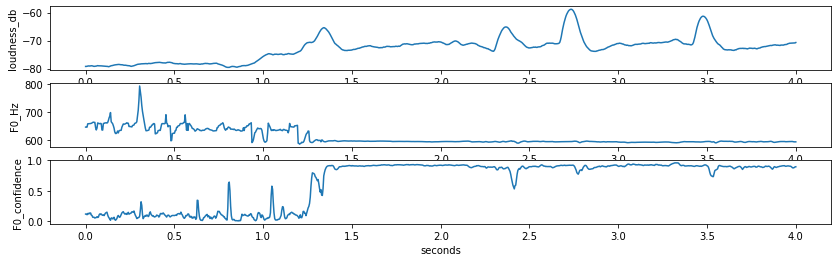

In [3]:
from ddsp.colab import colab_utils
import ddsp.training
from matplotlib import pyplot as plt
import numpy as np

TRAIN_TFRECORD_FILEPATTERN = "drive/MyDrive/ddsp/urmp-mono/group*.tfrecord*"
data_provider = ddsp.training.data.TFRecordProvider(TRAIN_TFRECORD_FILEPATTERN)
dataset = data_provider.get_dataset(shuffle=True)

try:
  ex = next(iter(dataset))
except StopIteration:
  raise ValueError(
      'TFRecord contains no examples. Please try re-running the pipeline with '
      'different audio file(s).')

ex = next(iter(dataset))
colab_utils.specplot(ex['audio'])
colab_utils.play(ex['audio'])

f, ax = plt.subplots(3, 1, figsize=(14, 4))
x = np.linspace(0, 4.0, 1000)
ax[0].set_ylabel('loudness_db')
ax[0].plot(x, ex['loudness_db'])
ax[1].set_ylabel('F0_Hz')
ax[1].set_xlabel('seconds')
ax[1].plot(x, ex['f0_hz'])
ax[2].set_ylabel('F0_confidence')
ax[2].set_xlabel('seconds')
ax[2].plot(x, ex['f0_confidence'])

# Initialize GAN

In [4]:
from ddsp.synths import BasicUpsampler
import numpy as np
from matplotlib import pyplot as plt
from ddsp.colab.jupyter_utils import show_audio

sample_rate = 16000
n_samples = 4*sample_rate

In [8]:
ex.keys()

dict_keys(['audio', 'f0_confidence', 'f0_hz', 'loudness_db'])

## Decoder
- DDSP style decoder, copy from train_autoencoder

## Discriminator

In [9]:
ex.keys()
ex['audio_tensor'] = ex['audio']

In [11]:
ex.keys()

dict_keys(['audio', 'f0_confidence', 'f0_hz', 'loudness_db', 'audio_tensor'])

In [15]:
from ddsp.training import discriminator

critic = discriminator.ParallelWaveGANDiscriminator(input_keys=['audio_tensor', 'f0_hz', 'loudness_db'])
critic_score = critic(ex)

critic_score

IndexError: ignored

## Gan Autoencoder

In [ ]:
import ddsp
from ddsp.training import models, preprocessing, decoders, discriminator
from ddsp import synths



dag = [(synths.TensorToAudio(), ['audio_tensor'])]

ae = models.Autoencoder(
    preprocessor=None,
    encoder=None,
    decoder=decoders.TimbrePaintingDecoder(name='tpd', input_keys=('amplitudes', 'f0_hz')),
    processor_group=ddsp.processors.ProcessorGroup(dag=dag, name='processor_group'),
    discriminator=discriminator.ParallelWaveGANDiscriminator(input_keys=['discriminator_audio', 'f0_hz', 'amplitudes']),
    losses=[]
)

batch = {
    'f0_hz': f0_hz,
    'amplitudes': amplitudes,
    'audio': np.random.normal(0,1,size=n_samples)
}
outputs = ae(batch)

outputs.keys()

dict_keys(['inputs', 'f0_hz', 'amplitudes', 'audio', 'audio_tensor', 'tensor_to_audio', 'out', 'audio_synth'])

# Training
- Copy training loop from demo/train_autoencoder.ipynb